In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
!kaggle datasets download -d residentmario/iowa-liquor-sales

Dataset URL: https://www.kaggle.com/datasets/residentmario/iowa-liquor-sales
License(s): CC0-1.0
iowa-liquor-sales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
df = pd.read_csv('iowa-liquor-sales.zip',compression='zip')
df

C:\Users\arham\AppData\Local\Temp\ipykernel_5616\3523170751.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('iowa-liquor-sales.zip',compression='zip')


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,INV-08368000074,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,73802,FrappaChata Iced Coffee Blend,12,800,$8.00,$12.00,3,$12.00,2.40,0.63
12591073,INV-08368000075,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20375,Old Forester Statesman,6,750,$27.48,$41.22,2,$41.22,1.50,0.39
12591074,INV-08368000076,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20372,Old Forester 1897 Whisky Row Series,6,750,$24.98,$37.47,2,$37.47,1.50,0.39
12591075,INV-08368000077,10/31/2017,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20369,Old Forester 1870 Whisky Row Series,6,750,$22.49,$33.74,2,$33.74,1.50,0.39


# Exploratory Data Analysis and Cleaning

In [4]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,1.259108e+07,1.251190e+07,1.258306e+07,1.259107e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07
mean,3.565216e+03,5.724050e+01,1.044710e+06,2.574911e+02,4.603682e+04,1.222533e+01,9.289402e+02,8.140392e+00,7.489119e+00,1.977358e+00
std,9.312721e+02,2.726983e+01,5.435094e+04,1.416175e+02,5.301684e+04,7.458673e+00,7.340448e+02,2.217891e+01,2.679149e+01,7.077822e+00
min,2.106000e+03,1.000000e+00,1.012200e+05,1.000000e+01,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,3.100000e+01,1.012210e+06,1.150000e+02,2.705600e+04,6.000000e+00,7.500000e+02,2.000000e+00,1.500000e+00,4.000000e-01
50%,3.704000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,4.000000e+00,3.000000e+00,7.900000e-01
75%,4.304000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.375500e+04,1.200000e+01,1.000000e+03,1.200000e+01,9.000000e+00,2.380000e+00
max,9.932000e+03,9.900000e+01,1.901200e+06,9.870000e+02,9.992750e+05,6.000000e+02,3.780000e+05,1.500000e+04,1.500000e+04,3.962580e+03


In [5]:
columns = df.columns.tolist()
columns

['Invoice/Item Number',
 'Date',
 'Store Number',
 'Store Name',
 'Address',
 'City',
 'Zip Code',
 'Store Location',
 'County Number',
 'County',
 'Category',
 'Category Name',
 'Vendor Number',
 'Vendor Name',
 'Item Number',
 'Item Description',
 'Pack',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

'Date' is in an incorrect format, we need to convert it to datetime

In [7]:
#Converting it to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df = df[df['Date'].dt.year >= 2017]
df

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\arham\AppData\Local\Temp\ipykernel_5616\3057597126.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\arham\AppData\Local\Temp\ipykernel_5616\3057597126.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\arham\AppData\Local\Temp\ipykernel_5616\3057597126.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
10635601,INV-02499700024,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,19068,Jim Beam,6,1750,20.99,31.49,1,188.94,1.75,0.46
10635618,INV-02499700025,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,19064,Jim Beam,24,375,5.25,7.88,1,189.12,0.37,0.09
10635910,INV-02499700026,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,25877,Sunny Brook Blend Whiskey,12,1000,4.72,7.08,2,6.68,2.00,0.52
10636088,INV-02499700027,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,25878,Sunny Brook Blend Whiskey,6,1750,7.87,11.81,1,70.86,1.75,0.46
10636142,INV-02499700028,2017-01-03,5259,Gameday Liquor,NaN,NaN,NaN,NaN,NaN,NaN,...,23824,Five Star,24,375,2.00,3.00,5,3.00,1.87,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,INV-08368000074,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,73802,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63
12591073,INV-08368000075,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20375,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39
12591074,INV-08368000076,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20372,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39
12591075,INV-08368000077,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20369,Old Forester 1870 Whisky Row Series,6,750,22.49,33.74,2,33.74,1.50,0.39


In [8]:
df.isnull().sum()

Invoice/Item Number         0
Date                        0
Store Number                0
Store Name                  0
Address                  1411
City                     1410
Zip Code                 1410
Store Location           1410
County Number            1410
County                   1410
Category                 5835
Category Name            5835
Vendor Number               1
Vendor Name                 1
Item Number                 0
Item Description            0
Pack                        0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [9]:
missing_percentage_of_data = (df.isnull().sum() / len(df)) * 100
missing_percentage_of_data

Invoice/Item Number      0.000000
Date                     0.000000
Store Number             0.000000
Store Name               0.000000
Address                  0.074930
City                     0.074877
Zip Code                 0.074877
Store Location           0.074877
County Number            0.074877
County                   0.074877
Category                 0.309862
Category Name            0.309862
Vendor Number            0.000053
Vendor Name              0.000053
Item Number              0.000000
Item Description         0.000000
Pack                     0.000000
Bottle Volume (ml)       0.000000
State Bottle Cost        0.000000
State Bottle Retail      0.000000
Bottles Sold             0.000000
Sale (Dollars)           0.000000
Volume Sold (Liters)     0.000000
Volume Sold (Gallons)    0.000000
dtype: float64

In [10]:
df["Category Name"].unique()

array(['Straight Bourbon Whiskies', 'Blended Whiskies', 'American Vodka',
       'Neutral Grain Spirits', 'American Flavored Vodka',
       'Canadian Whiskies', 'American Dry Gins', 'Imported Vodka',
       'Scotch Whiskies', 'American Brandies', 'Cocktails / RTD',
       'Whiskey Liqueur', 'Imported Schnapps',
       'American Cordials & Liqueurs', 'Temporary & Specialty Packages',
       'American Distilled Spirits Specialty', 'American Schnapps',
       'Imported Dry Gins', 'Imported Cordials & Liqueurs',
       'Cream Liqueurs', 'White Rum', 'Spiced Rum',
       'Imported Flavored Vodka', 'Imported Brandies',
       '100% Agave Tequila', 'Gold Rum', 'Irish Whiskies', 'Flavored Rum',
       'Mixto Tequila', 'Triple Sec', 'Tennessee Whiskies',
       'Imported Distilled Spirits Specialty', 'Straight Rye Whiskies',
       'Coffee Liqueurs', 'Aged Dark Rum',
       'Neutral Grain Spirits Flavored', 'American Vodkas',
       'American Sloe Gins', 'Flavored Gin', 'Single Malt Scotch',
  

In [11]:
df["County"].unique()

array([nan, 'POTTAWATTA', 'HOWARD', 'POLK', 'WARREN', 'DUBUQUE', 'Polk',
       'MONTGOMERY', 'LINN', 'Linn', 'JOHNSON', 'MARION', 'JONES',
       'DALLAS', 'STORY', 'SAC', 'WASHINGTON', 'JEFFERSON', 'LEE',
       'DES MOINES', 'Henry', 'BLACK HAWK', 'BREMER', 'BUCHANAN',
       'DELAWARE', 'WEBSTER', 'CALHOUN', 'IDA', 'CRAWFORD', 'MONONA',
       'WOODBURY', 'PLYMOUTH', 'CHEROKEE', 'BUENA VIST', 'BOONE',
       'Black Hawk', 'JACKSON', 'MUSCATINE', 'Marion', 'LUCAS', 'WAYNE',
       'APPANOOSE', 'DAVIS', 'MONROE', 'CLAY', 'POCAHONTAS', 'DICKINSON',
       'Dickinson', 'EMMET', 'CEDAR', 'PALO ALTO', 'CLINTON', 'Kossuth',
       'SCOTT', 'Hardin', 'Iowa', 'HUMBOLDT', 'WINNEBAGO', 'WAPELLO',
       'MAHASKA', 'Buchanan', 'Wapello', 'MARSHALL', 'TAMA', 'BENTON',
       'IOWA', 'POWESHIEK', 'Poweshiek', 'Scott', 'CERRO GORD', 'WORTH',
       'Cerro Gord', 'JASPER', 'Webster', 'Dallas', 'GREENE', 'CARROLL',
       'Boone', 'KOSSUTH', 'HARDIN', 'BUTLER', 'TAYLOR', 'CLARKE',
       'DECATUR',

In [12]:
df["County Number"].unique()

array([nan, 78., 45., 77., 91., 31., 69., 57., 52., 63., 53., 25., 85.,
       81., 92., 51., 56., 29., 44.,  7.,  9., 10., 28., 94., 13., 47.,
       24., 67., 97., 75., 18., 11.,  8., 49., 70., 59., 93.,  4., 26.,
       68., 21., 76., 30., 32., 16., 74., 23., 55., 82., 42., 48., 46.,
       95., 90., 62., 64., 86.,  6., 79., 17., 98., 50., 37., 14., 12.,
       87., 20., 27., 38., 35., 80., 73., 65., 22.,  2., 88., 61., 96.,
        3., 33., 40., 99.,  1., 41., 19., 66., 34., 89., 54., 58., 71.,
       72., 60., 84., 39., 15., 43., 83.,  5., 36.])

There are some missing values that cannot be imputed, they will be dropped

In [13]:
df_cleaned = df.dropna(subset=['Address', 'City', 'Zip Code', 'Store Location', 'Category', 'Vendor Number', 'Vendor Name', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)'])

# Since the dataset is big, we need to delete variables
del df

In [14]:
missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
missing_percentage_of_new_data

Invoice/Item Number      0.0
Date                     0.0
Store Number             0.0
Store Name               0.0
Address                  0.0
City                     0.0
Zip Code                 0.0
Store Location           0.0
County Number            0.0
County                   0.0
Category                 0.0
Category Name            0.0
Vendor Number            0.0
Vendor Name              0.0
Item Number              0.0
Item Description         0.0
Pack                     0.0
Bottle Volume (ml)       0.0
State Bottle Cost        0.0
State Bottle Retail      0.0
Bottles Sold             0.0
Sale (Dollars)           0.0
Volume Sold (Liters)     0.0
Volume Sold (Gallons)    0.0
dtype: float64

For the ones that might be imputable, let's try and explore them more

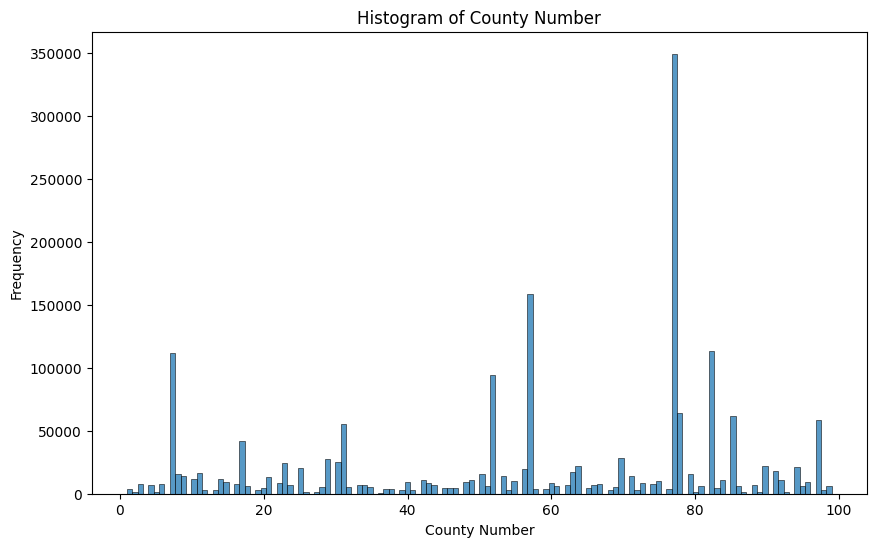

In [15]:
#Check the spread of the "County Number" column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['County Number'])
plt.title(f'Histogram of {'County Number'}')
plt.xlabel("County Number")
plt.ylabel('Frequency')
plt.show()

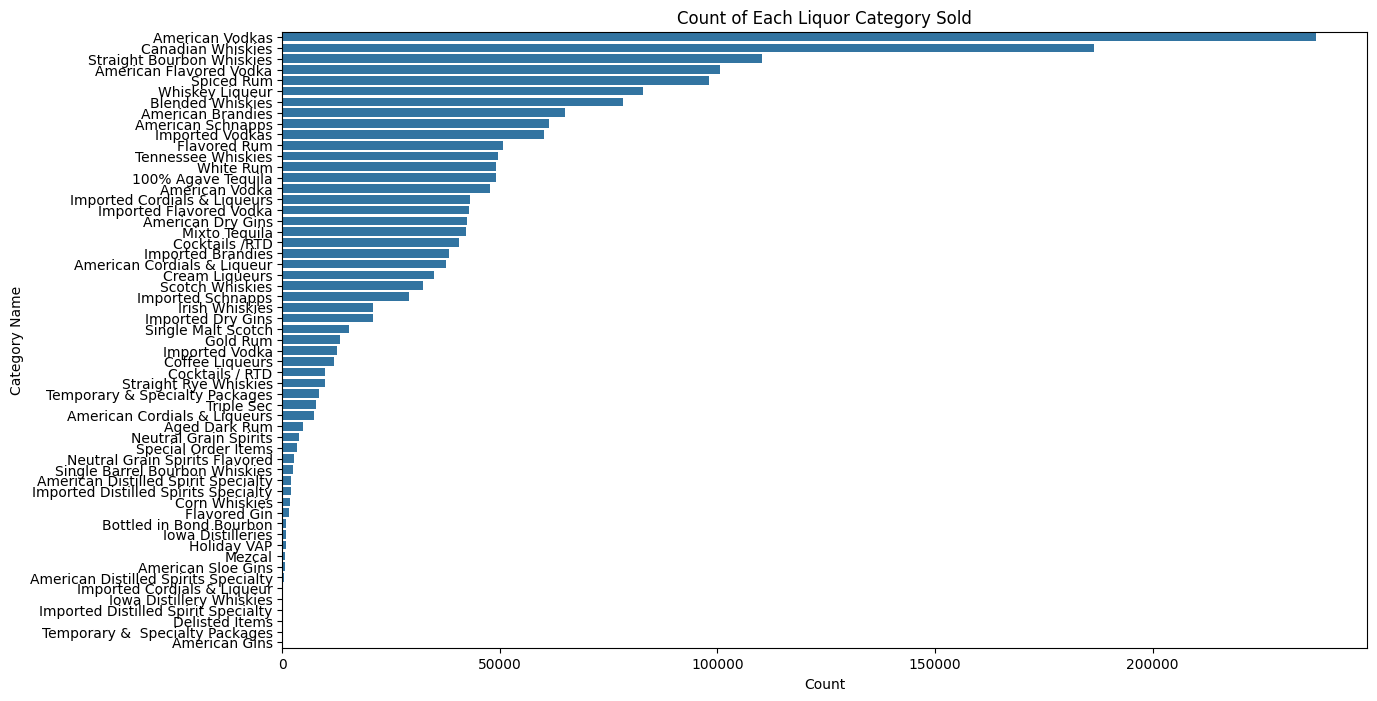

In [16]:
# visualize the distribution of different liquor categories sold.
plt.figure(figsize=(14, 8))
sns.countplot(y='Category Name', data=df_cleaned, order=df_cleaned['Category Name'].value_counts().index)
plt.title('Count of Each Liquor Category Sold')
plt.xlabel('Count')
plt.ylabel('Category Name')
plt.show()

In [17]:
# Check if there is a pattern of missing values in the Category Name column
for cat in df_cleaned[df_cleaned['Category Name'].isna()][['Category Name','Category']]['Category'].unique():
    print(cat,":\n ",df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index())

In [18]:
# Check if there is a pattern of missing values in the Category Name column
categories_needing_cleaning = df_cleaned[df_cleaned['Category Name'].isna()][['Category Name','Category']]['Category'].unique()
for cat in categories_needing_cleaning:
    print(cat,":\n ",pd.isna(df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index().reset_index()['Category Name'][0]))

In [19]:
for cat in categories_needing_cleaning:
    print(cat,":\n ",df_cleaned[df_cleaned['Category'] == cat]['Category Name'].value_counts(dropna=False).sort_index())

In [20]:
# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('Category')['Category Name'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['Category Name'] = df_cleaned.apply(lambda row: category_name_map.get(row['Category']) if pd.isna(row['Category Name']) else row['Category Name'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
# missing_percentage_of_new_data

C:\Users\arham\AppData\Local\Temp\ipykernel_5616\89954912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Category Name'] = df_cleaned.apply(lambda row: category_name_map.get(row['Category']) if pd.isna(row['Category Name']) else row['Category Name'], axis=1)


We have managed to impute most of the values in Category Name using Category. Since we are not interested in the identifier for Category Name for our model analysis, we can simply drop the Category column.

In [21]:
df_cleaned = df_cleaned.drop('Category',axis=1)
# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
# missing_percentage_of_new_data

We can apply the same cleaning approach for County and County Number

In [22]:
# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('County Number')['County'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['County'] = df_cleaned.apply(lambda row: category_name_map.get(row['County']) if pd.isna(row['County']) else row['County'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
# missing_percentage_of_new_data

In [23]:
# Check if there is a pattern of missing values in the County column
categories_needing_cleaning = df_cleaned[df_cleaned['County'].isna()][['County','Zip Code']]['Zip Code'].unique()
for cat in categories_needing_cleaning:
    print(cat,":\n ",df_cleaned[df_cleaned['Zip Code'] == cat]['County'].value_counts(dropna=False).sort_index())

In [24]:
# Standardize county names 
df_cleaned['County'] = df_cleaned['County'].str.lower()

# Create a dictionary mapping Category to Category Name
category_name_map = df_cleaned.groupby('Zip Code')['County'].first().to_dict()

# Fill missing Category Name based on Category
df_cleaned['County'] = df_cleaned.apply(lambda row: category_name_map.get(row['County']) if pd.isna(row['County']) else row['County'], axis=1)

# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
# missing_percentage_of_new_data

Since County and County Number have a high amount of missing values that we are unable to impute, we will drop these colums

In [25]:
df_cleaned = df_cleaned.drop(labels= ['County','County Number'],axis=1)

We can now go ahead and drop any rows with missing data that we were not able to impute

In [26]:
df_cleaned = df_cleaned.dropna()
# missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
# missing_percentage_of_new_data

We can extract day names, and the day of month from our date variable to use as a feature

In [27]:
df_cleaned['Day Name'] = df_cleaned['Date'].dt.day_name()
df_cleaned['Day Of Month'] = df_cleaned['Date'].dt.day
df_cleaned[['Day Name', 'Day Of Month']]

,Day Name,Day Of Month
10708015,Tuesday,3
10708016,Tuesday,3
10708017,Tuesday,3
10708018,Tuesday,3
10708019,Tuesday,3
...,...,...
12591072,Tuesday,31
12591073,Tuesday,31
12591074,Tuesday,31
12591075,Tuesday,31


In [28]:
# Define variables with column names that will need to be handled different ways
categorical_columns = ['Day Name','Day Of Month','City']
# max_aggregation_columns = ['Pack','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail']
target_variable = ['Bottles Sold']
columns_to_drop = ['index','Invoice/Item Number', 'Item Number', 'Item Description','Store Number','Store Location','Address',
                  'Vendor Number','Store Name','Vendor Name','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)','Zip Code']

# Drop these columns as they are not available or not relevant when predicting demand at a category level
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(labels=columns_to_drop,axis=1)

First, we will apply one-hot encoding to our categorical features. To prevent the number of features from blowing up, we will use min_frequency to stop the use of values that occur rarely

In [29]:
# ohe_df = df_cleaned[categorical_columns]
for col in categorical_columns:
    if col in df_cleaned.columns:
        if col == 'City':
            ohe = OneHotEncoder(min_frequency=30,drop='first',sparse_output=False)
        else:
            ohe = OneHotEncoder(drop='first',sparse_output=False)
        print(col)
        ohe_data = pd.DataFrame(ohe.fit_transform(df_cleaned[[col]]), columns = ohe.get_feature_names_out([col]))
        df_cleaned = pd.concat([df_cleaned,ohe_data],axis=1)
        df_cleaned = df_cleaned.drop(labels=col,axis=1)
        
df_cleaned

Day Name
Day Of Month
City


,Date,Category Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Day Name_Monday,Day Name_Saturday,Day Name_Thursday,...,City_Williamsburg,City_Wilton,City_Windsor Heights,City_Winfield,City_Winterset,City_Winthrop,City_Woodbine,City_Woodward,City_Zwingle,City_infrequent_sklearn
0,2017-01-03,Scotch Whiskies,6,1750,10.52,15.78,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-03,Imported Dry Gins,12,750,10.50,15.75,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-03,Imported Cordials & Liqueurs,6,750,9.83,14.75,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-03,Cream Liqueurs,12,1000,16.50,24.75,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-03,Canadian Whiskies,12,1000,9.71,14.57,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875849,2017-10-31,Cocktails /RTD,12,800,8.00,12.00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1875850,2017-10-31,Straight Bourbon Whiskies,6,750,27.48,41.22,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1875851,2017-10-31,Bottled in Bond Bourbon,6,750,24.98,37.47,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1875852,2017-10-31,Straight Bourbon Whiskies,6,750,22.49,33.74,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
agg_func ={}

for col in df_cleaned.columns: 
    if col in target_variable:
        agg_func[col] = 'sum'
    elif col in ['Date','Category Name']:
        continue
    else:
        agg_func[col] = 'max'

grouped_data= df_cleaned.groupby(by= ['Date','Category Name']).agg(agg_func).reset_index()
grouped_data

,Date,Category Name,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Day Name_Monday,Day Name_Saturday,Day Name_Thursday,...,City_Williamsburg,City_Wilton,City_Windsor Heights,City_Winfield,City_Winterset,City_Winthrop,City_Woodbine,City_Woodward,City_Zwingle,City_infrequent_sklearn
0,2017-01-03,100% Agave Tequila,48,1750,187.50,281.25,493,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-03,Aged Dark Rum,12,1750,23.00,34.50,61,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-03,American Brandies,48,1750,18.75,28.13,799,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-03,American Cordials & Liqueur,12,1750,8.07,12.11,16,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-03,American Cordials & Liqueurs,48,1000,13.29,19.94,399,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,2017-10-31,Temporary & Specialty Packages,12,1950,35.42,53.13,163,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10210,2017-10-31,Tennessee Whiskies,48,1750,35.24,52.86,752,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10211,2017-10-31,Triple Sec,12,1000,3.84,5.76,101,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10212,2017-10-31,Whiskey Liqueur,48,3000,30.00,45.00,1133,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, we can one-hot encode Category Name so that it can go into our machine learning model

In [31]:
try:
    del ohe
    del df_cleaned
except:
    pass

ohe = OneHotEncoder(drop='first',sparse_output=False)
df_ohe = pd.DataFrame(ohe.fit_transform(grouped_data[['Category Name']]) , columns = ohe.get_feature_names_out(['Category Name']))
grouped_data = pd.concat([grouped_data,df_ohe],axis=1)
del ohe
del df_ohe
grouped_data = grouped_data.drop(labels= ['Date','Category Name'],axis=1)
grouped_data

,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Day Name_Monday,Day Name_Saturday,Day Name_Thursday,Day Name_Tuesday,Day Name_Wednesday,...,Category Name_Special Order Items,Category Name_Spiced Rum,Category Name_Straight Bourbon Whiskies,Category Name_Straight Rye Whiskies,Category Name_Temporary & Specialty Packages,Category Name_Temporary & Specialty Packages,Category Name_Tennessee Whiskies,Category Name_Triple Sec,Category Name_Whiskey Liqueur,Category Name_White Rum
0,48,1750,187.50,281.25,493,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,1750,23.00,34.50,61,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48,1750,18.75,28.13,799,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,1750,8.07,12.11,16,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48,1000,13.29,19.94,399,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,12,1950,35.42,53.13,163,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10210,48,1750,35.24,52.86,752,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10211,12,1000,3.84,5.76,101,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10212,48,3000,30.00,45.00,1133,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
grouped_data['Bottles Sold'].describe()

count    10214.000000
mean       410.973468
std        601.621536
min          0.000000
25%         27.000000
50%        204.000000
75%        540.000000
max       5046.000000
Name: Bottles Sold, dtype: float64

<Axes: ylabel='Bottles Sold'>

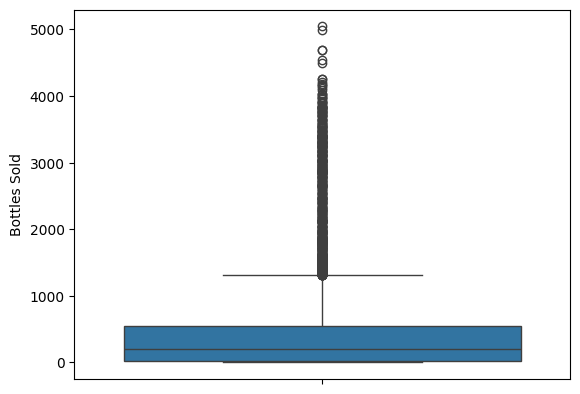

In [33]:
sns.boxplot(grouped_data['Bottles Sold'])

In [34]:
grouped_data.to_csv("cleaned_data.csv")
del grouped_data

# Machine Learning

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [36]:
# Load dataset
df = pd.read_csv('cleaned_data.csv')

df['Bottles Sold'].describe()

count    10214.000000
mean       410.973468
std        601.621536
min          0.000000
25%         27.000000
50%        204.000000
75%        540.000000
max       5046.000000
Name: Bottles Sold, dtype: float64

In [37]:
# Define features and target
X = df.drop('Bottles Sold', axis=1)
y = df['Bottles Sold']

# Define a pipeline object to implement regression algorithms
pipeline = Pipeline(steps=[('regressor', LinearRegression())])

# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=324)


param_grid = [
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': np.arange(0.1,50,0.1)
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': np.arange(0.1,50,0.1)
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': np.linspace(5,10000,1,dtype=int),
        'regressor__max_depth': np.linspace(2,100,1,dtype=int)
    },
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': np.linspace(10,1000,5,dtype=int),
        'regressor__weights': ['uniform', 'distance']
    }
]


# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best model: {best_model}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best model: Pipeline(steps=[('regressor', Lasso(alpha=0.1))])
Mean Squared Error: 35029.03209969413
R-squared: 0.9097139767608724


C:\Users\arham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+08, tolerance: 2.904e+05
  model = cd_fast.enet_coordinate_descent(


In [38]:
# Extract and print the best performance for each model
results = pd.DataFrame(grid_search.cv_results_)
results['model'] = results['param_regressor'].apply(lambda x: type(x).__name__)
best_results = results.groupby('model').apply(lambda x: x.loc[x['rank_test_score'].idxmin()])

print("\nBest performance for each model:")
for model, row in best_results.iterrows():
    print(f"{model}:")
    print(f"  Best Parameters: {row['params']}")
    print(f"  Best Cross-Validated MSE: {-row['mean_test_score']}")
    print()


Best performance for each model:
KNeighborsRegressor:
  Best Parameters: {'regressor': KNeighborsRegressor(), 'regressor__n_neighbors': 10, 'regressor__weights': 'distance'}
  Best Cross-Validated MSE: 232075.85417834166

Lasso:
  Best Parameters: {'regressor': Lasso(), 'regressor__alpha': 0.1}
  Best Cross-Validated MSE: 34717.12184642235

LinearRegression:
  Best Parameters: {'regressor': LinearRegression()}
  Best Cross-Validated MSE: 35255.82685963058

RandomForestRegressor:
  Best Parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': 2, 'regressor__n_estimators': 5}
  Best Cross-Validated MSE: 129133.67798228865

Ridge:
  Best Parameters: {'regressor': Ridge(), 'regressor__alpha': 2.7}
  Best Cross-Validated MSE: 34927.6031544025



C:\Users\arham\AppData\Local\Temp\ipykernel_5616\2454244945.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  best_results = results.groupby('model').apply(lambda x: x.loc[x['rank_test_score'].idxmin()])


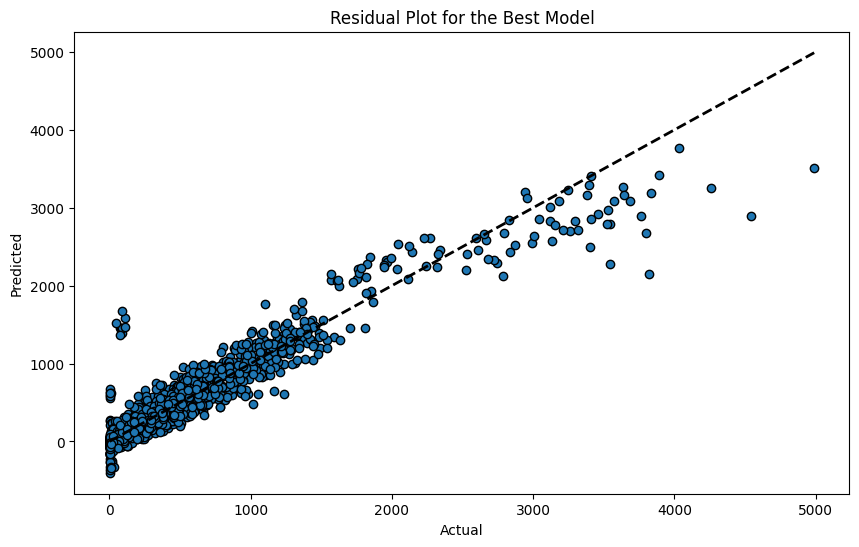

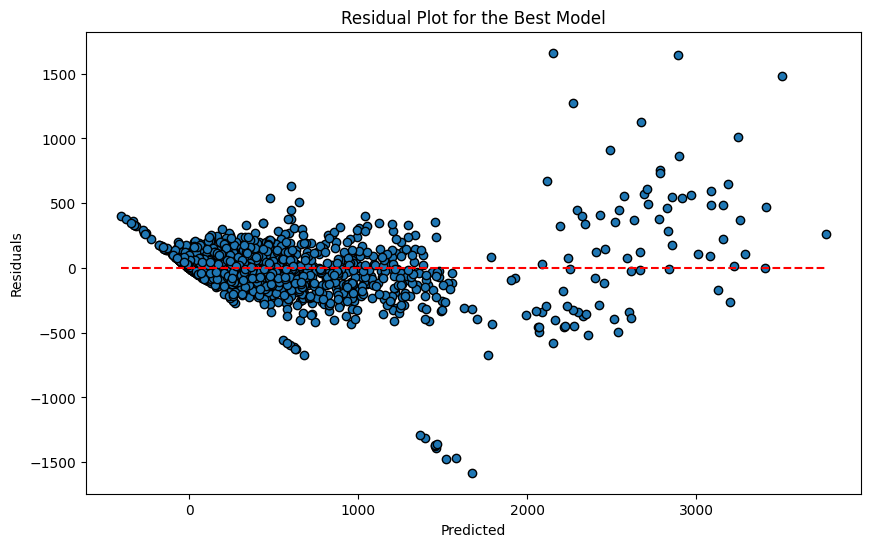

In [39]:
# Residual plot for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Residual Plot for the Best Model')
plt.show()

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolors=(0, 0, 0))
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot for the Best Model')
plt.show()

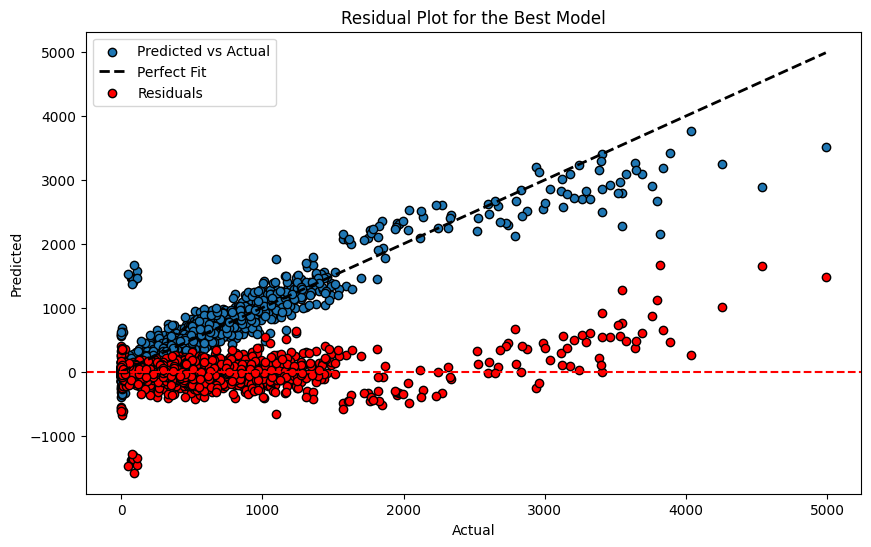

In [40]:
# Residual plot for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Residual Plot for the Best Model')

# Residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='red', edgecolors=(0, 0, 0), label='Residuals')

plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.show()